In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import glob

In [2]:
CURRENT_DIR = Path.cwd()
DATA_DIR = CURRENT_DIR / "data"

Load roster

In [3]:
roster = pd.read_csv(
    DATA_DIR / 'roster.csv',
    converters={"NetID": str.lower, "Email Address": str.lower},
    usecols=['Section', 'Email Address', 'NetID'],
    index_col='NetID'
    )

In [4]:
roster.head()

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2


### Loading the Homework and Exam Data

In [5]:
hw_exam_grades = pd.read_csv(
    DATA_DIR / 'hw_exam_grades.csv',
    converters={'SID': str.lower},
    usecols=lambda title: "Submission" not in title,
    index_col='SID'
)

In [6]:
hw_exam_grades.head(10)

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100
ara97741,Amy,Adams,49.0,80,53,80,55,80,78,100,...,39,60,54,60,87,100,74,100,76,100
alw07647,Amy,White,71.0,80,60,80,72,80,95,100,...,47,60,41,60,99,100,95,100,99,100
axd67070,Amy,Dunn,72.0,80,61,80,50,80,90,100,...,48,60,50,60,93,100,96,100,86,100
ajt73762,Amy,Terry,71.0,80,54,80,76,80,93,100,...,54,60,49,60,60,100,81,100,79,100


### Loading the Quiz Files

Load quiz grades (quiz_1_grades.csv, ..., quiz_5_grades.csv)

In [7]:
quiz_grades = pd.DataFrame()

for file_path in DATA_DIR.glob("quiz_*_grades.csv"):
    
    quiz_name = " ".join(file_path.stem.title().split("_")[:2])

    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=["Email"],
        usecols=["Email", "Grade"]
    ).rename(columns={'Grade': quiz_name})

    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)

In [8]:
quiz_grades.head()

,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
Email,,,,,
richard.bennett@univ.edu,10,6,9,8,10
timothy.parker@univ.edu,9,14,13,14,10
carol.reyes@univ.edu,5,15,8,14,6
brooke.powers@univ.edu,6,10,17,10,8
michael.taylor@univ.edu,5,15,13,12,5


In [9]:
final_df = roster.join(hw_exam_grades)

In [10]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,45,60,46,60,86,100,62,100,90,100
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,45,60,37,60,60,100,91,100,93,100
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,59,60,53,60,100,100,84,100,64,100
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,42,60,40,60,72,100,83,100,77,100
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,59,60,48,60,96,100,80,100,86,100


In [11]:
quiz_grades.columns

Index(['Quiz 1', 'Quiz 2', 'Quiz 3', 'Quiz 4', 'Quiz 5'], dtype='object')

In [12]:
quiz_grades.index

Index(['richard.bennett@univ.edu', 'timothy.parker@univ.edu',
       'carol.reyes@univ.edu', 'brooke.powers@univ.edu',
       'michael.taylor@univ.edu', 'belinda.bailey@univ.edu',
       'marcia.stevens@univ.edu', 'katelyn.faulkner@univ.edu',
       'william.daniel@univ.edu', 'dylan.johnson@univ.edu',
       ...
       'tamara.warren@univ.edu', 'courtney.wolf@univ.edu',
       'brandon.flores@univ.edu', 'patricia.evans@univ.edu',
       'luke.davidson@univ.edu', 'jeffrey.perez@univ.edu',
       'angela.dunlap@univ.edu', 'richard.elliott@univ.edu',
       'donna.nguyen@univ.edu', 'timothy.ramirez@univ.edu'],
      dtype='object', name='Email', length=150)

### Merging the Grade DataFrames

In [13]:
final_df = pd.merge(final_df, quiz_grades, left_on="Email Address", right_index=True)

In [14]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,6,14,11,7,7


In [15]:
final_df = final_df.fillna(0)

In [16]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,6,14,11,7,7


### Calculating Grades With Pandas DataFrames
## Exam grades

In [17]:
n_exams = 3
for n in range(1, n_exams + 1):
    final_df[f'Exam {n} Score'] = final_df[f'Exam {n}'] / final_df[f'Exam {n} - Max Points']

In [18]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,90,100,4,10,11,7,10,0.86,0.62,0.90
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,93,100,8,10,10,13,6,0.60,0.91,0.93
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,64,100,8,6,14,9,4,1.00,0.84,0.64
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,77,100,8,8,8,13,5,0.72,0.83,0.77
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,86,100,6,14,11,7,7,0.96,0.80,0.86


## Homework Grades

In [34]:
hw_max_cols = sorted([x for x in final_df.columns if 'Home' in x and 'Max' in x])
hw_cols = sorted([x for x in final_df.columns if 'Home' in x and 'Max' not in x])

In [37]:
hw_score_by_total = final_df[hw_cols].sum(axis=1) / final_df[hw_max_cols].sum(axis=1)

In [38]:
final_df['HW by Total'] = hw_score_by_total

In [39]:
hw_max_data = final_df[hw_max_cols].set_axis(hw_cols, axis=1)

In [40]:
hw_score_by_avg = (final_df[hw_cols] / hw_max_data).sum(axis=1) / len(hw_cols)

In [41]:
final_df['HW by Average'] = hw_score_by_avg

In [42]:
final_df['Homework Score'] = final_df[['HW by Total', 'HW by Average']].max(axis=1)

In [43]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average,Homework Score
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,11,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,10,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,6,14,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,8,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,14,11,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742


## Quiz grades

In [46]:
quiz_scores = final_df.filter(regex=r"^Quiz \d$", axis=1)

In [48]:
n_quiz = quiz_scores.shape[1]

In [49]:
quiz_max_points = pd.Series(
    {'Quiz 1': 11, 'Quiz 2': 15, 'Quiz 3': 17, 'Quiz 4': 14, 'Quiz 5': 12}
)

In [50]:
quiz_score_by_total = quiz_scores.sum(axis=1) / quiz_max_points.sum()

In [51]:
quiz_score_by_avg = (quiz_scores / quiz_max_points).sum(axis=1) / n_quiz

In [52]:
final_df['Quiz Score'] = pd.concat([quiz_score_by_total, quiz_score_by_avg], axis=1).max(axis=1)

In [53]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average,Homework Score,Quiz Score
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,11,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.682149
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,14,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.615286
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,11,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.652174


### Grouping the Data to Calculate Final Scores

In [54]:
weights = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.10,
        "Exam 3 Score": 0.15,
        "Quiz Score": 0.30,
        "Homework Score": 0.40,
    }
)

In [57]:
final_df['Final Score'] = (final_df[weights.index] * weights).sum(axis=1)

In [58]:
final_df['Ceiling Score'] = np.ceil(final_df['Final Score'] * 100)

In [59]:
def get_letter_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

In [61]:
letter_grades = final_df['Ceiling Score'].map(get_letter_grade)

In [62]:
final_df['Final Grade'] = pd.Categorical(
    letter_grades, categories=['F', 'D', 'C', 'B', 'A'], ordered=True
)

In [63]:
final_df['Final Grade']

NetID
wxb12345    C
mxl12345    B
txj12345    C
jgf12345    C
smj00936    C
           ..
pmj37756    B
dsl24347    C
nxe44872    C
bxr62103    C
jxw53347    C
Name: Final Grade, Length: 150, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

### Writing the Data to CSV Files

In [64]:
cols_to_write = ["Last Name", 'First Name', 'Email Address', 'Ceiling Score', 'Final Grade']

In [70]:
for section, df in final_df.groupby("Section"):
    section_file = DATA_DIR / f"section_{section}_grades.csv"
    df[cols_to_write].sort_values(by=['Last Name', 'First Name']).to_csv(section_file)

In [74]:
pd.read_csv(DATA_DIR / "section_1_grades.csv")

,NetID,Last Name,First Name,Email Address,Ceiling Score,Final Grade
0,ara97741,Adams,Amy,amy.adams@univ.edu,75.0,C
1,cxa22039,Allen,Christina,christina.allen@univ.edu,79.0,C
2,lxb98047,Baldwin,Lucas,lucas.baldwin@univ.edu,83.0,B
3,wxb12345,Barrera,Woody,woody.barrera_jr@univ.edu,75.0,C
4,jxb40799,Bauer,John,john.bauer@univ.edu,78.0,C
5,djb29817,Beck,David,david.beck@univ.edu,68.0,D
6,rjb91830,Bennett,Richard,richard.bennett@univ.edu,79.0,C
7,cxd92501,Dennis,Cameron,cameron.dennis@univ.edu,67.0,D
8,eed42850,Dudley,Emily,emily.dudley@univ.edu,74.0,C
9,exd72538,Duffy,Erin,erin.duffy@univ.edu,79.0,C


### Plotting and Analyzing the Data

In [78]:
grade_counts = final_df['Final Grade'].value_counts().sort_index()

<AxesSubplot:>

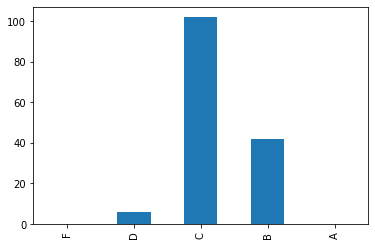

In [79]:
grade_counts.plot.bar()

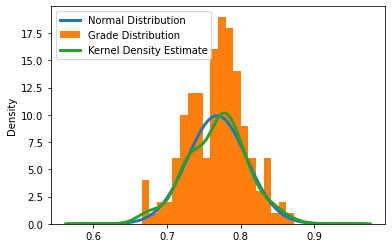

In [86]:
grade_mean = final_df['Final Score'].mean()
grade_std = final_df['Final Score'].std()

import scipy.stats
import matplotlib.pyplot as plt

x = np.linspace(grade_mean - 5*grade_std, grade_mean + 5*grade_std, 200)
y = scipy.stats.norm.pdf(x, loc=grade_mean, scale=grade_std)

plt.plot(x, y, label='Normal Distribution', linewidth=3)

final_df['Final Score'].plot.hist(bins=20, label= 'Grade Distribution')

final_df['Final Score'].plot.density(
    linewidth=3, label='Kernel Density Estimate'
)
plt.legend()